In [2]:
import matplotlib.pyplot as plt
import numpy as np

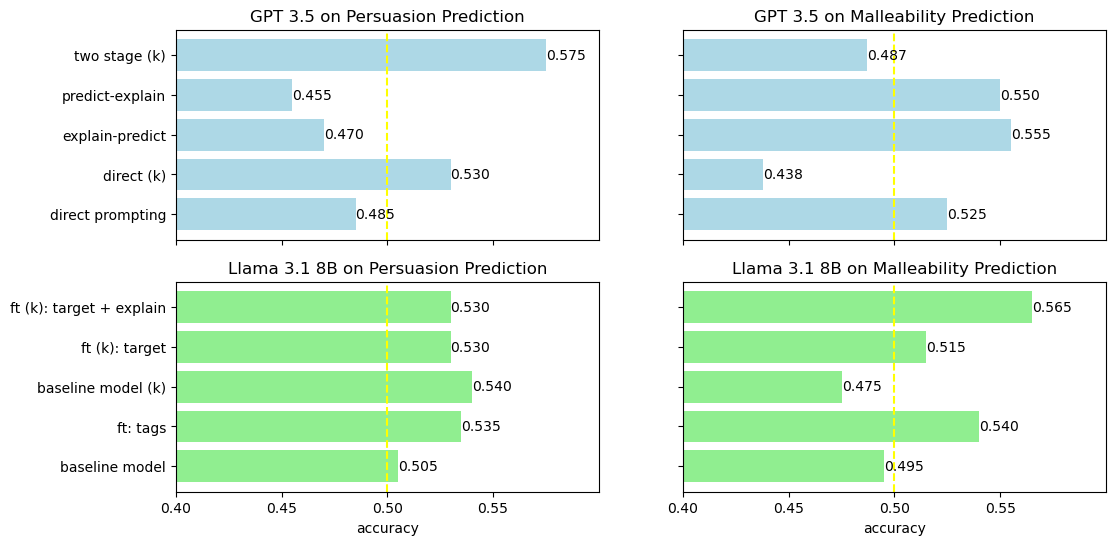

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey='row')
methods = [("direct prompting", "direct (k)","explain-predict","predict-explain", "two stage (k)"), ("baseline model", "ft: tags", "baseline model (k)", "ft (k): target", "ft (k): target + explain")]
titles = [("GPT 3.5 on Persuasion Prediction", "GPT 3.5 on Malleability Prediction"), 
         ("Llama 3.1 8B on Persuasion Prediction", "Llama 3.1 8B on Malleability Prediction")]
colors = ["lightblue" , "lightgreen"]
performances = [((0.485, 0.53 , 0.470, 0.455, 0.575), (0.525, 0.438, 0.555, 0.550, 0.487)),
                ((0.505, 0.535, 0.540, 0.530, 0.530), (0.495, 0.540, 0.475, 0.515, 0.565))]

def draw_graphs(axs, performances, methods, titles):
    for irow in range(2):
        for icol in range(2):
            hbars = axs[irow, icol].barh(methods[irow], performances[irow][icol],
                                         align='center', color=colors[irow])
            axs[irow, icol].invert_yaxis()
            axs[irow, icol].bar_label(hbars, fmt='%.3f')
            axs[irow, icol].set_xlim(0.4, 0.6)
            axs[irow, icol].set_xticks((np.arange(0.4, 0.6, 0.05)))
            axs[irow, icol].axvline(0.5, color='yellow', linestyle='--')
            axs[irow, icol].set_title(titles[irow][icol])
            axs[1, icol].set_xlabel("accuracy")
            
draw_graphs(axs, performances, methods, titles)
plt.savefig('graph.png', format='png', dpi=300, bbox_inches='tight')